# Visualization Basics

Courses involving computer programming frequently start with control structures and data structures.  Extensive education research has underscored the value in starting with visualization. Visualization offers 'early wins', producing something that is compelling and often fun. Like many of our skills, we will continue to refine and extend our knowledge of data visualization throughout each stage of the course,  Mastery comes through repetition.

## The Grammar of Graphics

The `seaborn` Object Interface implements the [Grammar of Graphics](https://www.amazon.com/dp/0387245448) in python. This approach to data visualization provides a powerful _abstraction_ around data visualization concepts. The theory has been around for a long time, but has become mainstream in data science through the work of Hadley Wickham and `ggplot2` implementation in R.  Python libraries have only begun to adopt this concept more recently, but it can now be found in many python visualization libraries, including `plotnine`, `altair`, and `seaborn`'s object interface.[^1]  


[1]: Choosing packages is an important but tricky question. Many academic courses pretend to dismiss the issue, arguing that if students learn the fundamental principles, they will always be able to use the whatever package is fashionable at the time.  There is some truth to this, but ignores obvious realities in the learning experience.  The large, decentralized and rapidly moving landscape of python nevertheless makes this choice difficult, especially in comparison to the R language, where for the past decade at least, a single company with intense focus on pedagogy and predictable standards have created and promoted the tightly integrated and widely adoptied `tidyverse`.  Of those mentioned implementing a grammar of graphics: `plotnine` is nearly-identical translation of the `ggplot2` syntax into python. It has only the core functionality of `ggplot2` and a smaller user community.  `altair` provides python bindings to the popular `vega` library in javascript which also implementing the grammar of graphics, and can be particularly useful in generating dashboards where interactive javascript can enrich the design. `seaborn` is already a popular within the Python community, and it's recently added object-oriented syntax provides a more 'pythonic' design than the aforementioned examples built around the syntax of other languages.

The fundemental principle of the grammar of graphics is that it expresses _mappings_ from data to aesthetics of a graph (color, size, x/y position, etc). For instance, different colors are often used in graphs to indicate different groups:

In [1]:
import ibis
df = ibis.read_csv("../data/co2.csv")
df.to_pandas()

,decimal_date,name,value
0,1958.2027,co2,315.71
1,1958.2027,smooth,314.44
2,1958.2877,co2,317.45
3,1958.2877,smooth,315.16
4,1958.3699,co2,317.51
...,...,...,...
1589,2024.3750,smooth,423.61
1590,2024.4583,co2,426.91
1591,2024.4583,smooth,424.44
1592,2024.5417,co2,425.55


The grammar of graphics always maps data (i.e. columns) to abstract aesthetics.  For instance, the categorical values in the "name" column can be mapped to indicate the color:

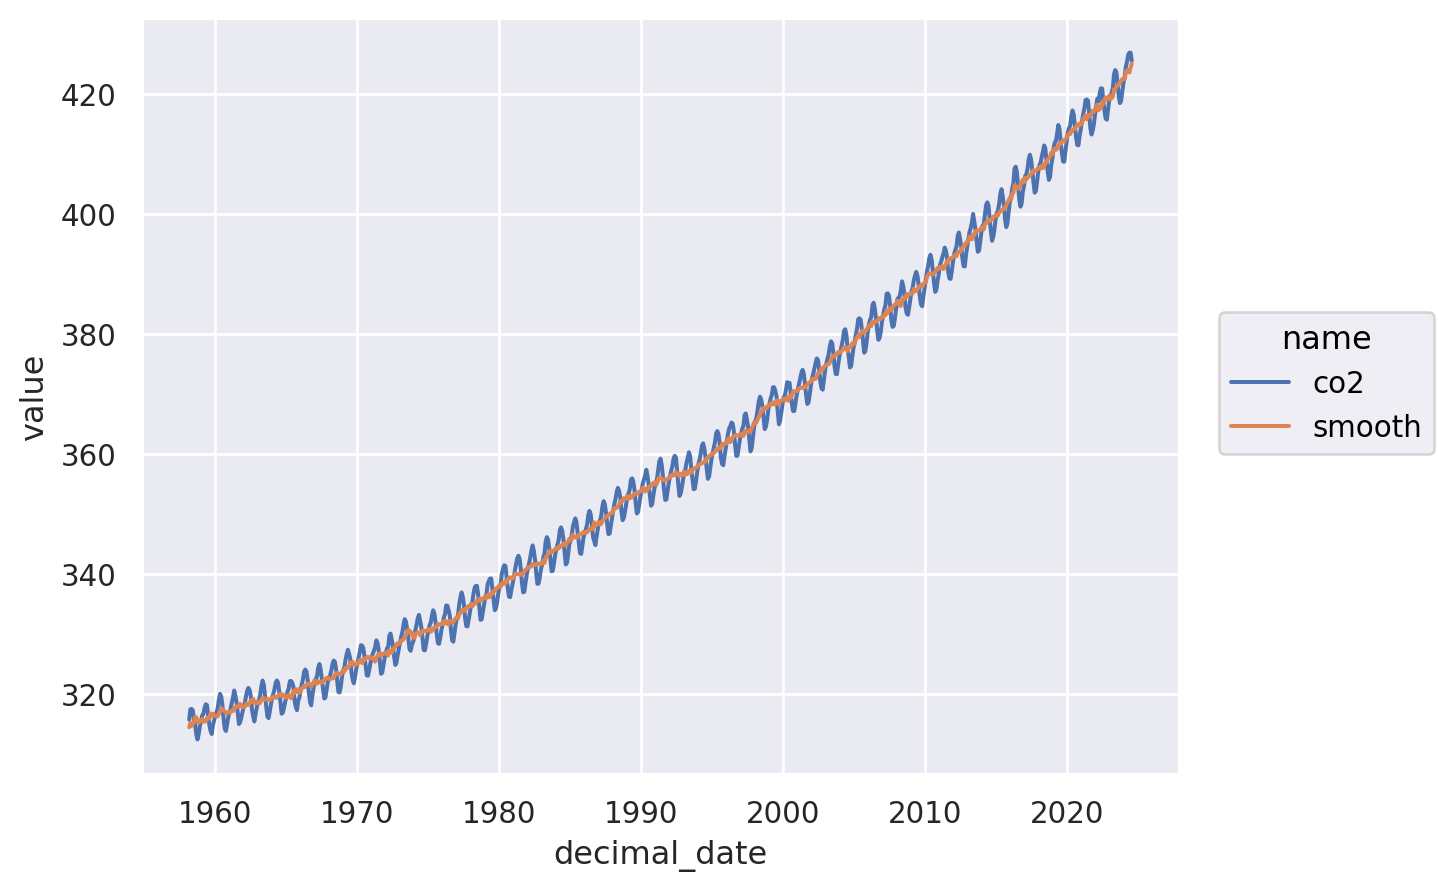

In [2]:
# Modern
import seaborn.objects as so
(
    so.Plot(df, x = 'decimal_date', y='value', color="name")
    .add(so.Line())
)

Many early plotting engines such as `matplotlib` and even the original `seaborn` do not fully reflect these principles. Learning the grammar makes it much easier to make and modify complex charts, while also encouraging best-practices such as tidy data and semantic code. 
Contrast this code with an alternative syntax that specifies the color manually:

<Axes: xlabel='decimal_date', ylabel='co2'>

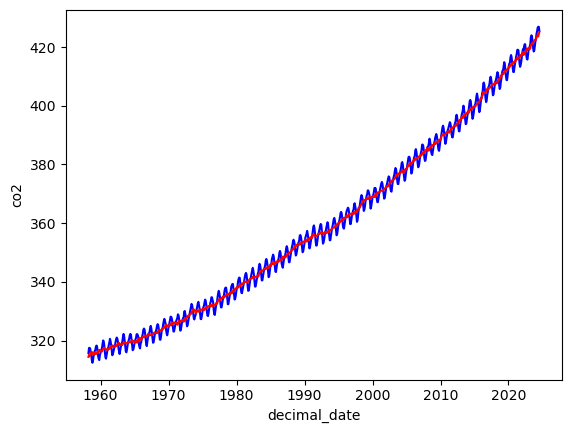

In [3]:
# Example of older verbose code
import seaborn as sns
df1 = df.pivot_wider()
sns.lineplot(df1, x="decimal_date", y = "co2", color="blue")
sns.lineplot(df1, x="decimal_date", y = "smooth", color="red")

In this syntax, `x` and `y` still refer to columns of the data, but `color` is asserted manually.  The relationship between color and data structure is not captured here.  If we wanted to use a different color scheme, we would have to manually update each assertion.  This is harder to generalize and more error-prone.  Note also that while this approach is somewhat more concise for a single x/y line, it quickly becomes more verbose, repeating many parts that do not need repeating in the previous approach.  We will avoid this older syntax.

In this example we can spot other advantages as well, such as default color theme informed by visualization research, and syntax that encourages the use of "tidy" data, in which columns represent variables and rows represent observations. This is sometimes called 'long' form, and more formally known as Cobb's Third Normal Form. This format takes some getting used to, and frequently requires some transformation or 'tidying' to achieve, since many wild-caught data examples do not follow this best practice, especially older and smaller datasets.  We will have more to say about this later.

**Additional Reading**

Read through the following tutorials on Seaborn

- [Object Interface Introduction](https://www.anaconda.com/blog/an-introduction-to-the-seaborn-objects-system)
- [Object Interface Walk-through](https://anaconda.cloud/seaborn-objects-system)

**References**

[Seaborn Object Interface](https://seaborn.pydata.org/tutorial/objects_interface.html)